98260만개 data (교수님+우리+오리지널)

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "3_classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from sklearn.model_selection import train_test_split
nd1=np.load('mnist_20211236_total.npz')#이윤재
nd2=np.load('mnist_20201572_1.npz')#구유정
nd3=np.load('mnist_20171372.npz')#김석우
nd4=np.load('mnist_20170565.npz')#김성년
nd6=np.load('H_MNIST_train.npz')
print(nd1['img'].shape, nd1['img'].dtype, nd1['label'].shape, nd1['label'].dtype)
print(nd2['img'].shape, nd2['img'].dtype, nd2['label'].shape, nd2['label'].dtype)
print(nd3['img'].shape, nd3['img'].dtype, nd3['label'].shape, nd3['label'].dtype)
print(nd4['img'].shape, nd4['img'].dtype, nd4['label'].shape, nd4['label'].dtype)
print(nd6['img'].shape, nd6['img'].dtype, nd6['label'].shape, nd6['label'].dtype)

X=np.concatenate((nd1['img'], nd2['img'],nd3['img'],nd4['img'],nd6['img']), axis=0)
y=np.concatenate((nd1['label'], nd2['label'],nd3['label'],nd4['label'],nd6['label']), axis=0)
np.savez_compressed('mnist_total.npz', X=X, y=y)
nd5=np.load('mnist_total.npz')
nd5
X.shape
X=X.reshape(30720,784)
#X_new=X[23040:30720]
#y_new=y[23040:30720]
#X_new.shape
#y_new.shape
type(X)

(1000, 28, 28) float64 (1000,) int64
(1000, 28, 28) float64 (1000,) int64
(1000, 28, 28) float64 (1000,) int32
(1000, 28, 28) float64 (1000,) int32
(26720, 28, 28) float64 (26720,) int64


numpy.ndarray

data cleaning 작업

In [4]:
a_3=y[23110:23120]
b_3=y[23230:23340]
c_3=y[23420:23450]
d_3=y[23520:23720]
e_3=y[23770:23780]
f_3=y[23900:23920]
g_3=y[23970:24110]
h_3=y[24140:24270]
i_3=y[24780:28410]
j_3=y[28460:30720]
a_4=y[:2000]
b_4=y[2100:2070]
c_4=y[2210:2220]
d_4=y[2230:2280]
e_4=y[2410:2800]
f_4=y[2900:6980]
g_4=y[6900:7300]
h_4=y[7400:7500]
i_4=y[7600:7680]
a_5=y[15361:18700]
b_5=y[19120:19290]
c_5=y[19300:19310]
d_5=y[19320:21760]
e_5=y[21780:21790]
f_5=y[21800:21810]
g_5=y[21820:21830]
h_5=y[21840:21850]
i_5=y[21860:21880]
j_5=y[21890:23050]
a_6=y[7680:8200]
b_6=y[8220:8340]
c_6=y[8360:9310]
d_6=y[9520:11920]
e_6=y[11950:12120]
f_6=y[12220:15361]
y_new=np.concatenate((a_3,b_3,c_3,d_3,e_3,f_3,h_3,g_3,h_3,i_3,j_3,a_4, b_4,c_4,d_4,e_4,f_4,g_4,h_4,i_4,a_5,b_5,c_5,d_5,e_5,f_5,g_5,h_5,i_5
                     ,j_5,a_6,b_6,c_6,d_6,e_6,f_6))
y_new.shape

(28260,)

In [5]:
a=X[23110:23120]
b=X[23230:23340]
c=X[23420:23450]
d=X[23520:23720]
e=X[23770:23780]
f=X[23900:23920]
g=X[23970:24110]
h=X[24140:24270]
i=X[24780:28410]
j=X[28460:30720]
a_0=X[:2000]
b_0=X[2100:2070]
c_0=X[2210:2220]
d_0=X[2230:2280]
e_0=X[2410:2800]
f_0=X[2900:6980]
g_0=X[6900:7300]
h_0=X[7400:7500]
i_0=X[7600:7680]
a_1=X[15361:18700]
b_1=X[19120:19290]
c_1=X[19300:19310]
d_1=X[19320:21760]
e_1=X[21780:21790]
f_1=X[21800:21810]
g_1=X[21820:21830]
h_1=X[21840:21850]
i_1=X[21860:21880]
j_1= X[21890:23050]
a_2=X[7680:8200]
b_2=X[8220:8340]
c_2=X[8360:9310]
d_2=X[9520:11920]
e_2=X[11950:12120]
f_2=X[12220:15361]

X_new=np.concatenate((a,b,c,d,e,f,h,g,h,i,j,a_0, b_0,c_0,d_0,e_0,f_0,g_0,h_0,i_0,a_1,b_1,c_1,d_1,e_1,f_1,g_1,h_1,i_1
                     ,j_1,a_2,b_2,c_2,d_2,e_2,f_2))
X_new=X_new.reshape(28260,784)
X_new.shape


(28260, 784)

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
X_mnist, y_mnist = mnist["data"], mnist["target"] # X, y: pandas DataFrame
y_mnist=y_mnist.astype(np.uint8)
X.shape
y.shape

(30720,)

In [7]:
X_final=np.concatenate((X_new,X_mnist))
y_final=np.concatenate((y_new,y_mnist))

mnist를 dataframe 에서 array 로 변환(concatate 하더라도 mnist 변수 따로 쓰면 data frame 이므로.)

In [9]:
X_mnist=np.array(X_mnist)


print(X_mnist.shape)
print(type(X_mnist))

y_mnist=np.array(y_mnist)


print(y_mnist.shape)
print(type(y_mnist))

(70000, 784)
<class 'numpy.ndarray'>
(70000,)
<class 'numpy.ndarray'>


3:1:1로 data split

In [10]:
from sklearn.model_selection import train_test_split
X_train0, X_test, y_train0, y_test = train_test_split(X_final, y_final, test_size=0.1, shuffle =True, random_state = 8)
X_train, X_val, y_train, y_val = train_test_split(X_train0, y_train0,test_size=float(1/9), shuffle =True,random_state= 8) # 0.25 x 0.8 = 0.2

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(78608, 784) (9826, 784) (9826, 784)
(78608,) (9826,) (9826,)


------------------------------------------------------
##여기서부터 모델 학습

scaling

mlp fit


In [11]:
#일반적으로 standardscaler로 scaling
import time
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

mlp_clf=MLPClassifier(random_state=42)

start_time=time.time()
mlp_clf.fit(X_train,y_train)
print('Fit time : ', time.time()-start_time)

cross_val_score(mlp_clf, X_train, y_train, cv=3, scoring="accuracy")

Fit time :  198.4263060092926


array([0.85971072, 0.85921459, 0.85856042])

accuracy

In [12]:
from sklearn.metrics import accuracy_score
import time
start_time = time.time()
pred =mlp_clf.predict(X_val)
print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_val, pred))

Fit time :  0.13107872009277344
0.862609403623041


# mlp confusion matrix

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

def results(y_val, pred):
    print(classification_report(y_val,pred))
    print(confusion_matrix(y_val,pred))

    return confusion_matrix(y_val,pred)
conf_mlp=results(y_val,pred)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1952
           1       0.92      0.92      0.92      2076
           2       0.88      0.86      0.87      1930
           3       0.82      0.83      0.83      1988
           4       0.87      0.87      0.87      1915
           5       0.81      0.85      0.83      1891
           6       0.88      0.88      0.88      1962
           7       0.87      0.87      0.87      2043
           8       0.84      0.84      0.84      1968
           9       0.85      0.81      0.83      1927

    accuracy                           0.86     19652
   macro avg       0.86      0.86      0.86     19652
weighted avg       0.86      0.86      0.86     19652

[[1757   24   32   20   20   24   23   13   29   10]
 [  23 1910   27   24    7   14   30   14   19    8]
 [  47   24 1654   71   27   19   22   15   42    9]
 [  25   32   74 1650   15   80   13   26   44   29]
 [  23    7   23   23 1663   

confusion matrix error

Saving figure confusion_matrix_plot


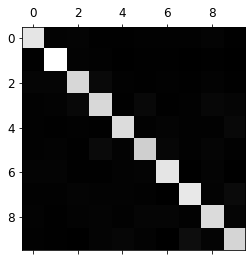

In [17]:
plt.matshow(conf_mlp, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [18]:
row_sums = conf_mlp.sum(axis=1, keepdims=True)
norm_conf_mlp = conf_mlp / row_sums
norm_conf_mlp

array([[0.88831967, 0.01485656, 0.01844262, 0.00870902, 0.00973361,
        0.0107582 , 0.01280738, 0.0102459 , 0.01895492, 0.00717213],
       [0.00722543, 0.93256262, 0.01589595, 0.011079  , 0.00289017,
        0.00674374, 0.00818882, 0.00433526, 0.00722543, 0.00385356],
       [0.0253886 , 0.02227979, 0.84663212, 0.03937824, 0.01243523,
        0.00777202, 0.01295337, 0.00932642, 0.01709845, 0.00673575],
       [0.01257545, 0.01559356, 0.03470825, 0.82444668, 0.00754527,
        0.03571429, 0.00704225, 0.01056338, 0.02867203, 0.02313883],
       [0.01044386, 0.00939948, 0.01305483, 0.00887728, 0.8694517 ,
        0.01096606, 0.01879896, 0.01253264, 0.01253264, 0.03394256],
       [0.0126917 , 0.01480698, 0.00687467, 0.04283448, 0.01480698,
        0.83024855, 0.02961396, 0.0126917 , 0.02432575, 0.01110524],
       [0.01834862, 0.01783894, 0.00917431, 0.00662589, 0.01478084,
        0.02038736, 0.88379205, 0.00356779, 0.02089704, 0.00458716],
       [0.01272638, 0.01076848, 0.0171316

Saving figure confusion_matrix_errors_plot


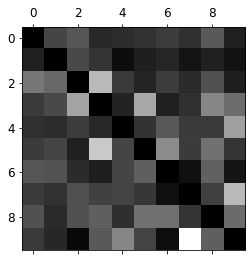

In [19]:
np.fill_diagonal(norm_conf_mlp, 0)
plt.matshow(norm_conf_mlp, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

auc 성능

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import roc_curve
total=0
for i in range(10):
      y_train_i=(y_train==i)
      y_val_i=(y_test==i)

      y_scores = cross_val_predict(mlp_clf, X_train, y_train_i, cv=3) 
      fpr, tpr, thresholds = roc_curve(y_train_i, y_scores)
      print("class",i," auc_score",roc_auc_score(y_train_i, y_scores))
      total+=roc_auc_score(y_train_i, y_scores)

class 0  auc_score 0.9305694154962416
class 1  auc_score 0.9587294586791636
class 2  auc_score 0.9236943810738811
class 3  auc_score 0.8985559485596286
class 4  auc_score 0.9237328384118574
class 5  auc_score 0.9141257212640578
class 6  auc_score 0.9288646589678913
class 7  auc_score 0.9236599660966591
class 8  auc_score 0.8904413287909139
class 9  auc_score 0.8933069258398268


grid search: Model Hyperparameter 선정

In [21]:
#처음에 fit을 X_train과 y_train을 6만개 정도 넘겨줬는데 너무 오래 걸려서 10000개 가지고만 best param 찾음.

In [14]:
from sklearn.model_selection import GridSearchCV

mlp_clf=MLPClassifier(random_state=42)
params={'hidden_layer_sizes':list(range(300,400,10))}
mlp_grid=GridSearchCV(mlp_clf,param_grid=params,cv=5,n_jobs=-1)
%time mlp_grid.fit(X_train[:10000],y_train[:10000])

CPU times: user 2min 54s, sys: 28.8 s, total: 3min 23s
Wall time: 7min 56s


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [300, 310, 320, 330, 340, 350,
                                                360, 370, 380, 390]})

In [15]:
#best parameter 로 조정 시 89.7 %
%time mlp_grid.best_estimator_.fit(X_train,y_train)
print(f'{mlp_grid.best_params_}{mlp_grid.best_estimator_.score(X_val,y_val):0.4f}')

CPU times: user 16min 31s, sys: 3min 9s, total: 19min 41s
Wall time: 3min 11s
{'hidden_layer_sizes': 350}0.8977


좋은 scaling 선정

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
sX_train_scaled = scaler.transform(X_train)
sX_val_scaled = scaler.transform(X_val)


from sklearn.preprocessing import RobustScaler
rscaler=RobustScaler()
rscaler.fit(X_train)
rX_train_scaled = rscaler.transform(X_train)
rX_val_scaled = rscaler.transform(X_val)


from sklearn.preprocessing import MinMaxScaler
mscaler=MinMaxScaler()
mscaler.fit(X_train)
mX_train_scaled = mscaler.transform(X_train)
mX_val_scaled = mscaler.transform(X_val)

from sklearn.preprocessing import Normalizer
nor=Normalizer()
nor.fit(X_train)
nX_train_scaled = nor.transform(X_train)
nX_val_scaled = nor.transform(X_val)

In [25]:
def fit_and_calScoreTime(clf,X_train,X_val,y_train,y_val):

  #fit_time
  start_time=time.time()
  clf.fit(X_train,y_train)
  fit_time=(time.time()-start_time)

  #pred_time
  start_time = time.time()
  pred = clf.predict(X_val)
  pred_time=(time.time() - start_time)
  
    #score
  score=clf.score(X_val,y_val)
  
  return score,fit_time,pred_time

In [26]:
names=["mlp"]
classifiers=[MLPClassifier()]

for name,clf in zip(names,classifiers):
  scaling_names=['No_scaling','StandardScaler','RobustScalar','MinmaxScalaer','Normalizer']
  t_score=[]
  t_fit_times=[]
  t_pred_times=[]

  #no scaling
  score,fit_time,pred_time=fit_and_calScoreTime(clf,X_train,X_val,y_train,y_val)
  t_score.append(score)
  t_fit_times.append(fit_time)
  t_pred_times.append(pred_time)


  try:
    #standardScaler
    sscore,sfit_time,spred_time=fit_and_calScoreTime(clf,sX_train_scaled,sX_val_scaled,y_train,y_val)
    t_score.append(sscore)
    t_fit_times.append(sfit_time)
    t_pred_times.append(spred_time)

    #RobustScaler
    rscore,rfit_time,rpred_time=fit_and_calScoreTime(clf,rX_train_scaled,rX_val_scaled,y_train,y_val)
    t_score.append(rscore)
    t_fit_times.append(rfit_time)
    t_pred_times.append(rpred_time)

    #MinmaxScalaer
    mscore,mfit_time,mpred_time=fit_and_calScoreTime(clf,mX_train_scaled,mX_val_scaled,y_train,y_val)
    t_score.append(mscore)
    t_fit_times.append(mfit_time)
    t_pred_times.append(mpred_time)

    #Normalizer
    nscore,nfit_time,npred_time=fit_and_calScoreTime(clf,nX_train_scaled,nX_val_scaled,y_train,y_val)
    t_score.append(nscore)
    t_fit_times.append(nfit_time)
    t_pred_times.append(npred_time)

  except ValueError:
    continue

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
print(t_score)
print(t_fit_times)     
print( t_pred_times)

[0.8623040911866476, 0.7657744758803176, 0.8091288418481579, 0.8349786281294524, 0.8910034602076125]
[315.3192059993744, 354.9483814239502, 272.1486222743988, 354.5510311126709, 323.6833300590515]
[0.14001727104187012, 0.14583492279052734, 0.14174270629882812, 0.14577412605285645, 0.14726877212524414]


In [28]:
def fit_and_calScoreTime(clf,X_train,X_val,y_train,y_val):

  #fit_time
  start_time=time.time()
  %time mlp_grid.best_estimator_.fit(X_train,y_train)
  fit_time=(time.time()-start_time)

  #pred_time
  start_time = time.time()
  pred = clf.predict(X_val)
  pred_time=(time.time() - start_time)
  
    #score
  score=mlp_grid.best_estimator_.score(X_val,y_val)
  
  return score,fit_time,pred_time

In [29]:
from sklearn.preprocessing import Normalizer
nor=Normalizer()
nor.fit(X_train)
nX_train_scaled = nor.transform(X_train)
nX_val_scaled = nor.transform(X_val)

nscore,nfit_time,npred_time=fit_and_calScoreTime(clf,nX_train_scaled,nX_val_scaled,y_train,y_val)

print(nscore)
print(nfit_time)     
print( npred_time)

CPU times: user 9min 50s, sys: 3min 24s, total: 13min 15s
Wall time: 7min 2s
0.9126806431915326
422.76255798339844
0.14510273933410645


In [ ]:
# Exercise 4.4
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("Normal_learning_curves_plot")  # not shown
plt.show()                        # not shown